In [1]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


In [1]:
%%time
from IPython.display import clear_output
clear_output()

from AZernike import *

Hello... Good morning!
Importing python packages was done.
Zernike functions are defined.
Current Time = 12:48:11
Wall time: 1.21 s


Plots of Radial Poolynomial


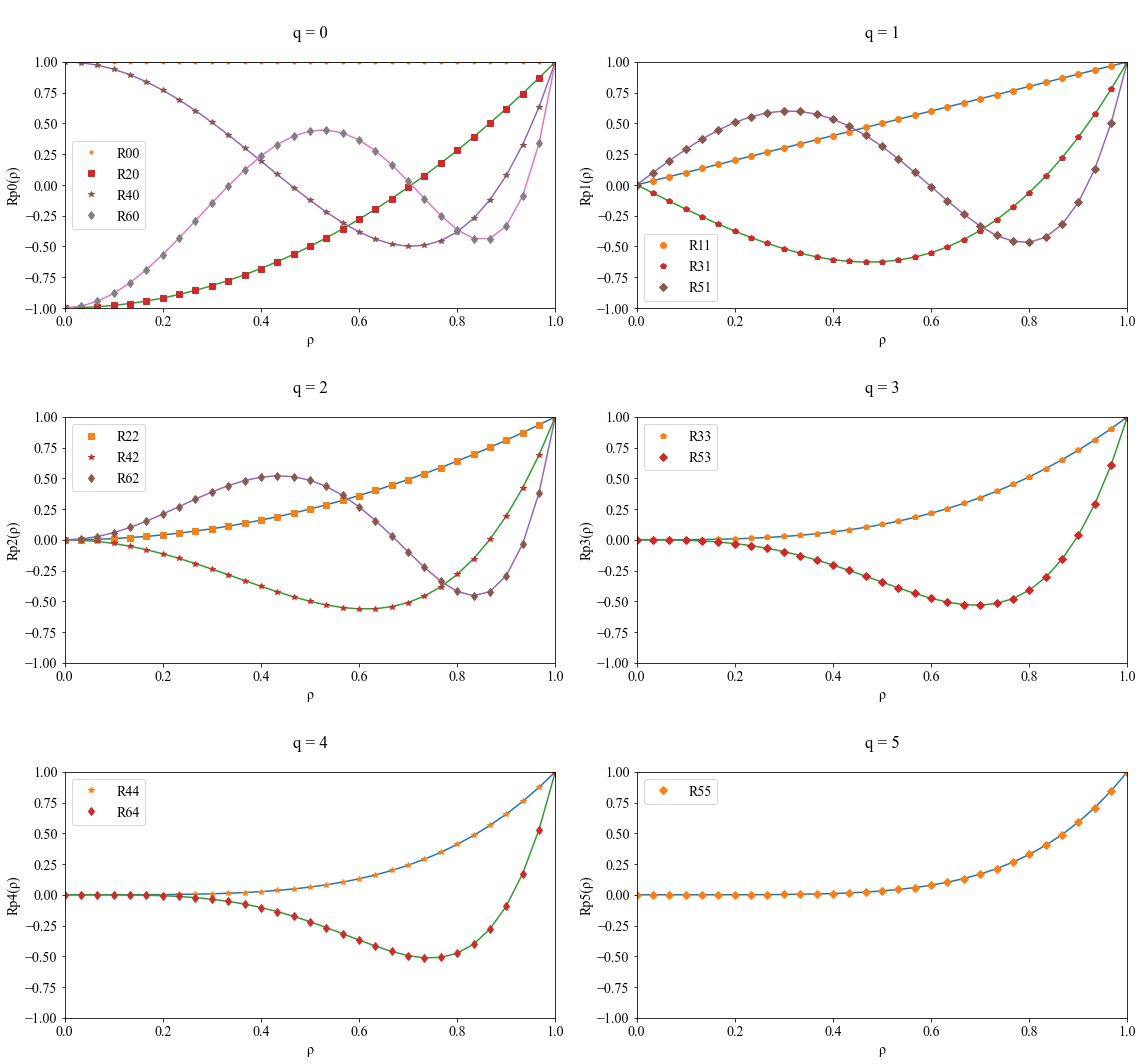

rho = [0.         0.03333333 0.06666667 0.1        0.13333333 0.16666667
 0.2        0.23333333 0.26666667 0.3        0.33333333 0.36666667
 0.4        0.43333333 0.46666667 0.5        0.53333333 0.56666667
 0.6        0.63333333 0.66666667 0.7        0.73333333 0.76666667
 0.8        0.83333333 0.86666667 0.9        0.93333333 0.96666667
 1.        ]
Done.
Wall time: 798 ms


In [2]:
%%time
clear_output()

print( "Plots of Radial Poolynomial" )

debug = 0

datas = []
datas.append( { "order" : (0, 0), "coeffs" : [1] })
datas.append( { "order" : (1, 1), "coeffs" : [1] })
datas.append( { "order" : (2, 0), "coeffs" : [2, -1] })
datas.append( { "order" : (2, 2), "coeffs" : [1] })

datas.append( { "order" : (3, 1), "coeffs" : [3, -2] })
datas.append( { "order" : (3, 3), "coeffs" : [1] })

datas.append( { "order" : (4, 0), "coeffs" : [6, -6, 1] })
datas.append( { "order" : (4, 2), "coeffs" : [4, -3] })
datas.append( { "order" : (4, 4), "coeffs" : [1] })

datas.append( { "order" : (5, 1), "coeffs" : [10, -12, 3] })
datas.append( { "order" : (5, 3), "coeffs" : [5, -4] })
datas.append( { "order" : (5, 5), "coeffs" : [1] })

datas.append( { "order" : (6, 0), "coeffs" : [20, -30, 12, -1] })
datas.append( { "order" : (6, 2), "coeffs" : [15, -20, 6] })
datas.append( { "order" : (6, 4), "coeffs" : [6, -5] })
#datas.append( { "order" : (6, 6), "coeffs" : [1] })

#plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "14"
row_cnt = 3; col_cnt = 2
fig, charts = plt.subplots( row_cnt, col_cnt, figsize=( 8.05*col_cnt, 5*row_cnt) )
charts = charts.flatten() if row_cnt*col_cnt > 1 else [ charts ]

step = 1/30
rho = np.arange( 0, 1 + step, step )
rho = rho[ np.where( rho <= 1 ) ]

markers = [ ".", "o", "s", "p", "*", "D", "d" ]

hash = {}

for data in datas : 
    order  = data[ "order" ]
    coeffs = data[ "coeffs" ]
    p = order[0] ; q = order[1]
    r_pl_numeric = Rpq( p, q, rho, hash=hash, debug=debug )
    
    r_pl_analytic = np.zeros_like( rho )
    for idx, coeff in enumerate( coeffs ) : 
        r_pl_analytic += coeff*np.power( rho, p - 2*idx )
    pass 

    chart = charts[q]
    chart.plot( rho, r_pl_analytic, linestyle="solid" )
    chart.plot( rho, r_pl_numeric, markers[p], label=f"R{p}{q}" )
    chart.set_xlim(  0, 1 )
    chart.set_ylim( -1, 1 )
    chart.set_xlabel( "ρ" )
    chart.set_ylabel( f"Rp{q}(ρ)" )
    chart.set_title( f"\nq = {q}\n" )
    chart.legend()
    #chart.legend(loc='upper left', bbox_to_anchor=(0.5, 0.1), fancybox=True, shadow=0, ncol=len(datas)//2)
pass

#chart.set_title( f"\nRadial Polynomials\n" )
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.0), fancybox=True, shadow=0, ncol=len(datas)//2)
plt.tight_layout(); plt.show()
print( f"rho = {rho}" )

print( "Done.")

Radial polynomail orthogonality validation


Resolution:   0%|          | 0/5 [00:00<?, ?it/s]


************************************************************
Resolution = 2, T = 5
Error avg. = 0.04221171567603516
Fail count = 47, Good count = 0

************************************************************
Resolution = 3, T = 5
Error avg. = 0.004117865214113674
Fail count = 47, Good count = 0

************************************************************
Resolution = 4, T = 5
Error avg. = 0.00041075312056433697
Fail count = 0, Good count = 47

************************************************************
Resolution = 5, T = 5
Error avg. = 4.106497801488134e-05
Fail count = 0, Good count = 47

************************************************************
Resolution = 6, T = 5
Error avg. = 4.106394460603909e-06
Fail count = 0, Good count = 47
Plotting .... 


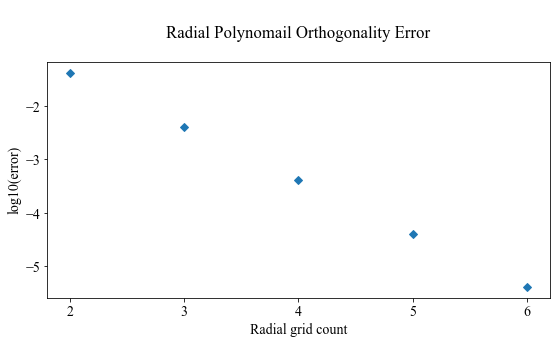


Done
Wall time: 1.94 s


In [4]:
%%time
clear_output()

print( "Radial polynomail orthogonality validation" )

debug = 1

error_avgs = []

resolutions = [ x for x in range( 2, 6 + 1 ) ]

for resolution in tqdm( resolutions, desc="Resolution" ):
    T = 5 #10 # 20 
    print( line2 )    
    print( f"Resolution = {resolution}, T = {T}" )
    
    dr = 1/(10**resolution)

    rho = np.arange( 0, 1 + dr, dr ) 
    rho = rho[ np.where( rho <= 1 ) ]

    # debug and print( f"rho = {rho}" )

    good_cnt = 0 
    fail_cnt = 0 

    error_sum = 0
    
    hash= {}

    for p in range( 0, T + 1 ) :
        for q in range( 0, T + 1 ) :
            for l in range( -q, q + 1 ) :
                if abs(l) > p or abs(l) > q:
                    continue ;
                elif   ( p - abs(l) )%2 == 1 :
                    continue
                elif ( q - abs(l) )%2 == 1 :
                    continue
                pass
            
                r_pl = Rpq( p, l, rho, hash=hash, debug=0 )
                r_ql = Rpq( q, l, rho, hash=hash, debug=0 )
                
                sum = 0 
                sum = np.sum(r_pl*r_ql*rho*dr)*2*(p + 1)
                
                expect = [0, 1][ p == q ]
                error = abs(expect -sum)
                error_sum += error
                success = error < 1/1_000 
                success_t = 'Good' if success else 'Fail'
                
                good_cnt += success
                fail_cnt += (not success)
                
                #print( f"[{p:02d}][{q:02d}] {success_t} : Rpl({p}, {l:2d})*Rql({q}, {l:2d}) = {sum}, exptect = {expect}", flush="True" )
            pass
        pass
    pass

    error_avg = error_sum/(good_cnt + fail_cnt)
    error_avgs.append( error_avg )

    print( f"Error avg. = {error_avg}" )
    print( f"Fail count = {fail_cnt}, Good count = {good_cnt}", flush="True" )
pass

print( "Plotting .... ", flush="True" )

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "14"

row_cnt = 1; col_cnt = 1
fig, charts = plt.subplots( row_cnt, col_cnt, figsize=( 8.1*col_cnt, 5*row_cnt) )
charts = charts.flatten() if row_cnt*col_cnt > 1 else [charts]
chart_idx = 0 
chart = charts[ chart_idx ]

resolutions = np.array( resolutions, np.uint8 )
error_avgs = np.log10( np.array( error_avgs ) )

chart.plot( resolutions, error_avgs, "D" )
chart.set_title( "\nRadial Polynomail Orthogonality Error\n" )
chart.set_xlabel( "Radial grid count" )
chart.set_ylabel( "log10(error)" )
chart.set_xticks( resolutions ) 

plt.tight_layout(); plt.show()

print( "\nDone")

In [6]:
# 저니크 모멘트
%%time
clear_output()

img = cv.imread( 'image/lenna.png', 0 )

shape = img.shape
width = 100
if shape[0] > shape[1] :
    img = cv.resize( img, (width, shape[0]*width//shape[1]) )
else :
    img = cv.resize( img, (shape[1]*width//shape[0], width) )
pass

img = np.array( [ [1, 0, 1, 1], [0, 1, 0, 1 ], [0, 1, 0, 1], [1, 1, 1, 1] ], np.uint8 )

shape = img.shape
print( "img shape= ", shape )

img_org = img 

k = 3
img = cv.resize( img_org, (img_org.shape[1]*k, img_org.shape[0]*k), interpolation=cv.INTER_AREA )

h = img.shape[0]
w = img.shape[1]
mwh = max( h, w )
r = math.sqrt( 2*mwh*mwh )
print( f"K = {k}, H = {h}, W = {w}, r = {r}" )
x, y = np.where( img > 0 )

np.set_printoptions(suppress=1)

if 1 : 
    print( "x = ", x )
    print( "y = ", y )
pass

x = x/r - 1/math.sqrt(2)
y = y/r - 1/math.sqrt(2)

if 1 : 
    print( "x = ", x )
    print( "y = ", y )
pass

T = 3
print( f"T = {T}" )
for p in range( T, -1, -1 ) : 
    for q in range( -p, p + 1 ) :
        if (p - abs(q))%2 == 0 : #짝수일 경우에만
            v_pq = Vpq( 6, 2, x, y )
            test = np.sum( v_pq*np.conjugate(v_pq) )
            #print( f"V_pq({p}, {q}) = ", v_pq )
            print( f"V^_pq*V_pq({p}, {q}) = ", test )
        pass
    pass
pass

# 서브 챠트 생성 
idx = 0 
fig, charts = plt.subplots( 1, 2, figsize=(10, 10) )
charts = charts.flatten()
chart = charts[ idx ] ; idx += 1
chart.set_title( "\nOriginal\n" )
chart.imshow( img_org, cmap='gray' )

chart = charts[ idx ] ; idx += 1
chart.set_title( f"\nScale({k})\n" )
chart.imshow( img, cmap='gray' )

print_profile()

plt.tight_layout(); plt.show()

UsageError: Line magic function `%%time` not found.
